For background, see this Github issue: https://github.com/ESCOMP/ctsm/issues/545

Here, I will check whether I can recover SMB over ice shelves

In [1]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import os, os.path
%matplotlib inline
import cartopy.crs as ccrs


In [4]:
!pip install fortran-magic

Exception:
Traceback (most recent call last):
  File "/glade/work/bitz/miniconda3/envs/pangeo/lib/python3.6/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/glade/work/bitz/miniconda3/envs/pangeo/lib/python3.6/site-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/glade/work/bitz/miniconda3/envs/pangeo/lib/python3.6/site-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/glade/work/bitz/miniconda3/envs/pangeo/lib/python3.6/site-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/glade/work/bitz/miniconda3/envs/pangeo/lib/python3.6/site-packages/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/glade/work/bitz/miniconda3/envs/pangeo/lib/python3.6/site-packages/pip/wheel.py", line 352, in move_wheel_files
    clobber(source, lib_dir, True)
  File "/glad

In [3]:
%load_ext fortranmagic

ModuleNotFoundError: No module named 'fortranmagic'

In [2]:

%%fortran
subroutine compute_fortran(x, y, z)
    real, intent(in) :: x(:), y(:)
    real, intent(out) :: z(size(x, 1))

    z = sin(x + y)

end subroutine compute_fortran

SyntaxError: invalid syntax (<ipython-input-2-f261bb9f609e>, line 2)

# Normal monthly gridded data

In [10]:
datadir = '/glade/collections/cdg/timeseries-cmip6/b.e21.BHIST.f09_g17.CMIP6-historical.001/lnd/proc/tseries/month_1'


In [11]:
varname = 'FSR_ICE'
filename = 'b.e21.BHIST.f09_g17.CMIP6-historical.001.clm2.h0.%s.185001-201412.nc' % varname

In [12]:
ds = xr.open_dataset(os.path.join(datadir,filename))

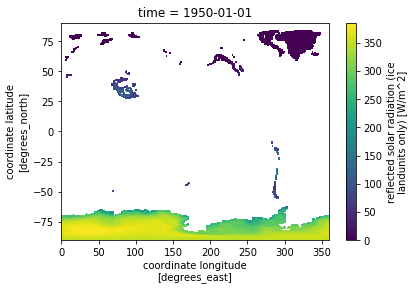

In [13]:
ds[varname].sel(time='1950-01').plot()

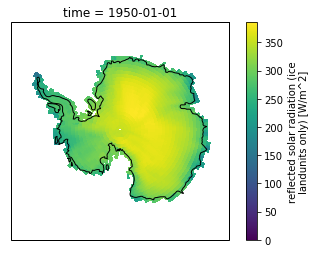

In [14]:
myproj = ccrs.PlateCarree()

myproj3 = ccrs.SouthPolarStereo()
fig, ax = plt.subplots(1, subplot_kw={'projection': myproj3})

ds[varname].sel(time='1950-01').plot(ax=ax, transform=myproj)
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax.grid()
ax.coastlines()


# Yearly file with QICE seperated by elevation class

In [15]:
filename = '/gpfs/fs1/scratch/cmip6/archive/b.e21.BHIST.f09_g17.CMIP6-historical.001/lnd/hist/b.e21.BHIST.f09_g17.CMIP6-historical.001.clm2.h3.1917-01-01-00000.nc'

ds = xr.open_dataset(filename)

In [22]:
#   elevclas = 11 ;
varname = 'QICE_FORC' #         float QICE_FORC(time, elevclas, lat, lon) ;
#ds[varname]


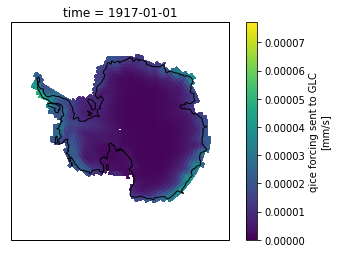

In [21]:
fig, ax = plt.subplots(1, subplot_kw={'projection': myproj3})

ds[varname].sel(elevclas=10).plot(ax=ax, transform=myproj)
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax.grid()
ax.coastlines()